# Introducción

El objetivo de este proyecto es la implementación de las primeras fases típicas de un proyecto de ciencia de datos, que son:

1. Recolección de datos
2. Limpieza de datos
3. Análisis de datos
4. Visualización de datos

El tema escogido es el análisis de los puestos de trabajos tecnológicos a nivel global y sus salarios. Nuestro objetivo es dar respuestas a preguntas como:

- ¿En que país están los mejores salarios?
- ¿Donde es mejor vivir teniendo en cuenta el salario y el coste de vida?
- ¿Donde es mejor vivir si se tiene en cuenta el coste de vida, el salario medio nacional y el índice de desarrollo humano?
- ¿Qué puestos de trabajos son los más demandados? Esta pregunta, dada la naturaleza de los datasets se centrará mayoritariamente en puestos laborales asociados a la IA.

Para ello analizaremos 5 datasets diferentes, los cuales se enumeraran más adelante. 


## Repositorio GITHUB asociado a este proyecto

En el siguiente enlace se puede encontrar el repositorio GITHUB asociado a este proyecto, donde se pueden encontrar los datasets, el código y las visualizaciones generadas, además, se puede observar un historial de cambios y mejoras del proyecto mediante el comando `git log`.

- Enlace al repositorio: [https://github.com/MichaeLaudrup/Python_for_AI_VIU](https://github.com/MichaeLaudrup/Python_for_AI_VIU)

## Requisitos antes de ejecutar el proyecto

- Este proyecto ha sido implementado con la versión de Python 3.10.11, sería recomendable utilizar esta versión o una superior.
- Junto a este proyecto tenemos un archivo `requirements.txt` que contiene las librerías necesarias para ejecutar el proyecto. Para instalar las librerías, se puede utilizar el siguiente comando:

```pip install -r requirements.txt```

# Fuentes de Datos Utilizadas

A continuación se detallan las fuentes utilizadas para el análisis del mercado laboral y condiciones socioeconómicas a nivel global:

### Puestos de Trabajo Relacionados con Inteligencia Artificial
- [Global AI Job Market and Salary Trends 2025 – Kaggle](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data)

### Puestos de Trabajo del Sector Tecnológico
- [Global Tech Salary Dataset – Kaggle](https://www.kaggle.com/datasets/yaaryiitturan/global-tech-salary-dataset)

### Coste de Vida por País
- [Cost of Living Index by Country (2024) – Kaggle](https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024)

### Salario Promedio por País
- [List of Countries by Average Wage (Mensual y Anual) – Kaggle](https://www.kaggle.com/datasets/meeratif/list-of-countries-by-average-wage-monthly-yearly)

### Índice de Desarrollo Humano (IDH)
- [Human Development Data Center – UNDP](https://hdr.undp.org/data-center/documentation-and-downloads)


## Importaciones

In [242]:
import pandas as pd
import os
import pycountry 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Cargado de datos y primera toma de contacto

En este apartado se cargan los datos de las distintas fuentes y se realiza una primera exploración para entender la estructura de los datos y las variables disponibles.

In [243]:
path_ai_jobs = os.path.join('data','ai_job_dataset.csv')
path_global_tech = os.path.join('data', 'global_tech_salary.txt')
path_cost_of_living = os.path.join('data', 'Cost_of_Living_Index_by_Country_2024.csv')
path_avg_salary = os.path.join('data', 'salary_data.csv')
path_idh = os.path.join('data', 'HDR25_Statistical.xlsx')

ai_job_df = pd.read_csv(path_ai_jobs, sep=',')
global_tech_df = pd.read_csv(path_global_tech, sep=',')
cost_of_life_df = pd.read_csv(path_cost_of_living, sep=',')
avg_salary_df = pd.read_csv(path_avg_salary, sep=',')
idh_df = pd.read_excel(path_idh, sheet_name='Table 1. HDI')

print('========================== OFERTAR LABORALES EN IA ===========================')
# Pasamos de snake_case a Title Case y quitamos guiones bajos
ai_job_df.columns = ai_job_df.columns.str.replace('_', ' ').str.title().str.strip()

# Renombramos la columna 'Employee Residence' a 'Country' para unificar con los otros DataFrames
ai_job_df = ai_job_df.rename(columns={'Employee Residence': 'Country'})
ai_job_df = ai_job_df.rename(columns={'Salary Usd': 'Salary USD'})
display(ai_job_df.sample(5))

print('========================== OFERTAS LABORALES A NIVEL TECNOLÓGICO GLOBAL ==========================')
global_tech_df.columns = global_tech_df.columns.str.replace('_', ' ').str.title().str.strip()

# Renombramos la columna 'Country or Area' a 'Country' para unificar con los otros DataFrames
global_tech_df = global_tech_df.rename(columns={'Employee Residence': 'Country'})
global_tech_df = global_tech_df.rename(columns={'Salary In Usd': 'Salary USD'})
display(global_tech_df.sample(5))

print('========================== COSTE DE VIDA POR PAÍSES ==========================')
display(cost_of_life_df.sample(5))

print('========================== SALARIO PROMEDIO POR PAÍSES ==========================')
# Pasamos de snake_case a Title Case y quitamos guiones bajos

avg_salary_df.columns = avg_salary_df.columns.str.replace('_', ' ').str.title().str.strip()
avg_salary_df = avg_salary_df.rename(columns={'Country Name': 'Country'})
display(avg_salary_df.sample(5))

print('========================== ÍNDICE DE DESARROLLO HUMANO (IDH) ==========================')
idh_df.columns = idh_df.columns.str.replace('_', ' ').str.title().str.strip()
idh_df = idh_df.rename(columns={'Country or Area': 'Country'})
idh_df = idh_df.rename(columns={'Human Development Index (Hdi)': 'Human Development Index'})
display(idh_df.sample(5))

========================== OFERTAR LABORALES EN IA ===========================


,Job Id,Job Title,Salary USD,Salary Currency,Experience Level,Employment Type,Company Location,Company Size,Country,Remote Ratio,Required Skills,Education Required,Years Experience,Industry,Posting Date,Application Deadline,Job Description Length,Benefits Score,Company Name
11367,AI11368,AI Consultant,97958,USD,EN,FT,Switzerland,M,Austria,100,"SQL, PyTorch, Docker, MLOps, Spark",Bachelor,1,Retail,2024-12-08,2025-01-25,2242,9.0,Algorithmic Solutions
13217,AI13218,AI Specialist,122620,GBP,SE,FL,United Kingdom,M,United Kingdom,50,"Mathematics, TensorFlow, Kubernetes",Associate,8,Technology,2024-11-17,2025-01-24,942,7.1,Quantum Computing Inc
7996,AI07997,AI Specialist,50792,USD,MI,CT,China,S,Singapore,0,"SQL, TensorFlow, R",Associate,2,Energy,2025-02-23,2025-04-27,1402,9.7,DataVision Ltd
5318,AI05319,Autonomous Systems Engineer,241233,USD,EX,CT,United States,L,Canada,50,"Python, Statistics, Docker, GCP, Spark",Bachelor,14,Technology,2025-04-07,2025-05-28,1006,7.8,Smart Analytics
10252,AI10253,Head of AI,46799,USD,EN,FL,Israel,L,Israel,100,"PyTorch, SQL, Computer Vision, Azure",PhD,0,Real Estate,2024-03-25,2024-05-27,1127,8.6,Cognitive Computing


========================== OFERTAS LABORALES A NIVEL TECNOLÓGICO GLOBAL ==========================


,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary USD,Country,Remote Ratio,Company Location,Company Size
4151,2024,MI,FT,Data Engineer,235000,USD,235000,US,0,US,M
1072,2024,EX,FT,Head of Machine Learning,438000,USD,438000,US,0,US,M
4344,2023,SE,FT,Data Scientist,140000,USD,140000,US,100,US,M
1113,2022,SE,FT,Analytics Engineer,110000,USD,110000,US,100,US,M
226,2023,EX,FT,Head of Data,200000,GBP,246080,GB,0,GB,M


========================== COSTE DE VIDA POR PAÍSES ==========================


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
90,91,Brazil,30.2,7.9,19.5,29.5,22.6,37.2
27,28,Cyprus,54.7,24.8,40.4,49.6,53.2,71.4
72,73,Zimbabwe,37.2,10.0,24.1,35.5,26.7,26.1
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1
61,62,Montenegro,39.4,15.8,28.1,36.7,36.3,52.9


========================== SALARIO PROMEDIO POR PAÍSES ==========================


,Country,Continent Name,Wage Span,Median Salary,Average Salary,Lowest Salary,Highest Salary
220,Zimbabwe,Africa,Monthly,555.40204,602.37635,151.42305,2674.772
137,Morocco,Africa,Monthly,1634.24000,1896.89000,477.63000,8433.850
12,Austria,Europe,Monthly,3572.94000,4016.91000,1014.80000,17864.690
89,Hong Kong,Asia,Monthly,4252.87000,4687.10000,1182.63000,20817.370
88,Honduras,Central America,Monthly,1022.22000,1139.39000,287.27000,5090.910


========================== ÍNDICE DE DESARROLLO HUMANO (IDH) ==========================


,Hdi Rank,Country,Human Development Index,Life Expectancy At Birth,Expected Years Of Schooling,Mean Years Of Schooling,Gross National Income (Gni) Per Capita,Gni Per Capita Rank Minus Hdi Rank,Hdi Rank.1
119,120,Morocco,0.710,75.313,15.074990,6.198000,8652.880859,5,122
36,37,Saudi Arabia,0.900,78.732,16.949430,11.606428,50298.913630,-7,37
160,161,Togo,0.571,62.739,13.096424,5.861115,2855.963828,9,161
142,143,Ghana,0.628,65.498,11.418460,7.107210,6846.352204,-8,144
185,186,Burkina Faso,0.459,61.092,8.733340,2.266550,2390.527778,-9,186


## Datos representativos de los datasets objeto de estudio

In [244]:
summary_df = pd.DataFrame({
    'Dataset asociado': ['Puestos de trabajo IA', 'Puestos de trabajo Tecnológicos', 'Coste de vida', 'Salario promedio por países', 'Indice de Desarrollo Humano (IDH)'],
    'Número de entradas': [len(ai_job_df), len(global_tech_df), len(cost_of_life_df), len(avg_salary_df), len(idh_df)],
    'Número de columnas': [ai_job_df.shape[1], global_tech_df.shape[1], cost_of_life_df.shape[1], avg_salary_df.shape[1], idh_df.shape[1]],
    'Columnas Categóricas': [
        ai_job_df.select_dtypes(include='object').shape[1],
        global_tech_df.select_dtypes(include='object').shape[1],
        cost_of_life_df.select_dtypes(include='object').shape[1],
        avg_salary_df.select_dtypes(include='object').shape[1],
        idh_df.select_dtypes(include='object').shape[1],
    ],
    'Columnas Numéricas': [
        ai_job_df.select_dtypes(include='number').shape[1],
        global_tech_df.select_dtypes(include='number').shape[1],
        cost_of_life_df.select_dtypes(include='number').shape[1],
        avg_salary_df.select_dtypes(include='number').shape[1],
        idh_df.select_dtypes(include='number').shape[1],
    ],
        'Nulos totales': [
        ai_job_df.isnull().sum().sum(),
        global_tech_df.isnull().sum().sum(),
        cost_of_life_df.isnull().sum().sum(),
        avg_salary_df.isnull().sum().sum(),
        idh_df.isnull().sum().sum()
    ],
    'Filas duplicadas': [
        ai_job_df.duplicated().sum(),
        global_tech_df.duplicated().sum(),
        cost_of_life_df.duplicated().sum(),
        avg_salary_df.duplicated().sum(),
        idh_df.duplicated().sum()
    ],
    'Número países implicados': [
        ai_job_df['Country'].nunique(),
        global_tech_df['Country'].nunique(),
        cost_of_life_df['Country'].nunique(),
        avg_salary_df['Country'].nunique(),
        idh_df['Country'].nunique()
    ]
    })

display(summary_df)

,Dataset asociado,Número de entradas,Número de columnas,Columnas Categóricas,Columnas Numéricas,Nulos totales,Filas duplicadas,Número países implicados
0,Puestos de trabajo IA,15000,19,14,5,0,0,20
1,Puestos de trabajo Tecnológicos,5000,11,7,4,0,1144,55
2,Coste de vida,121,8,1,7,0,0,121
3,Salario promedio por países,221,7,3,4,0,0,221
4,Indice de Desarrollo Humano (IDH),193,9,2,7,0,0,193


<b>Primeras conclusiones</b>
- El dataset puestos de trabajos en IA es rico en datos teniendo 15.000 entradas y 19 columnas, lo cual, nos proporcionará una buena base para tener una visión general del mercado laboral en IA.
- Los datasets de costes de vida, salario promedio por países e índice de desarrollo humano tienen un número de entradas coherentes con el número de países que existen en el mundo, aunque hay uqe subrayar que el dataset "Coste de vida" tiene un número de entradas inferior, por lo que no se podrá hacer una comparación directa con todos los países, sino que habrá que hacer una selección de los páises que están en común entre los cinco datasets.
- No hay valores nulos ni filas duplicadas en cuatro de los cinco datasets, lo cual es positivo para el análisis posterior. Sin embargo, el dataset de puestos de trabajos tecnológicos generales tiene un número significativo de duplicados, lo que podría afectar a los análisis relacionados con los salarios en el sector tecnológico, por esto, se eliminarán a continuación. 

## Limpieza de datos y normalización de datos

<b>Cambios básicos</b><br>

Empezamos con una eliminación de duplicados en el dataset de puestos de trabajos en IA, ya que hay entradas duplicadas. Esto es importante para evitar sesgos en el análisis posterior. Además, ponemos los nombres de los países en minúsculas para facilitar la comparación con los otros datasets.

In [245]:

global_tech_df = global_tech_df.drop_duplicates().reset_index(drop=True)

ai_job_df['Country'] = ai_job_df["Country"].str.strip().str.lower()
cost_of_life_df['Country'] = cost_of_life_df["Country"].str.strip().str.lower()
avg_salary_df['Country'] = avg_salary_df["Country"].str.strip().str.lower()
idh_df['Country'] = idh_df["Country"].str.strip().str.lower()
global_tech_df['Country'] = global_tech_df["Country"].str.strip().str.lower()

<b>Nombres de países en el dataset "Global Tech Salary"</b>

Tenemos un caso especial donde los nombres de páises en el dataset "Global Tech Salary" no coinciden con los nombres de países en los otros datasets. Por ejemplo, "USA" en lugar de "united states". Para solucionar esto, crearemos un diccionario de mapeo para normalizar los nombres de países utilizando la librería de terceros "pycountry" para obtener los nombres oficiales de los países y según su código ISO.


In [246]:
global_tech_df["Country"].unique()

def codigo_a_nombre(codigo):
    try:
        return pycountry.countries.get(alpha_2=codigo).name.strip().lower()
    except:
        return codigo
    
global_tech_df["Country"] = global_tech_df["Country"].map(codigo_a_nombre)

display(global_tech_df.sample(5))

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary USD,Country,Remote Ratio,Company Location,Company Size
1690,2023,SE,FT,Data Scientist,180000,USD,180000,united states,0,US,M
3258,2023,SE,FT,Data Engineer,112200,USD,112200,united states,0,US,M
1491,2023,SE,FT,AI Programmer,120000,USD,120000,canada,100,FR,M
3452,2023,SE,FT,Machine Learning Scientist,105500,USD,105500,united states,0,US,M
738,2022,SE,FT,Data Scientist,104000,USD,104000,united states,100,US,M


<b>Nivel de experiencia y tipo de trabajo</b>

Continuamos expandiendo los acrónimos de los niveles de experiencia y tipos de trabajo en el dataset "Global Tech Salary". Por ejemplo, "Jr" se convierte en "Junior", "Sr" en "Senior", y así sucesivamente. Esto nos permitirá tener una mejor comprensión de los datos y facilitará el análisis posterior.

In [247]:
EXPERIENCE_LEVEL_MAP = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Executive-level",
}

EMPLOYMENT_TYPE_MAP = {
    "FT": "Full-time",
    "PT": "Part-time",
    "CT": "Contract",
    "FL": "Freelance",
    "IN": "Internship",
}

COMPANY_SIZE_MAP = {
    "S": "Small",
    "M": "Medium",
    "L": "Large",
}

global_tech_df['Experience Level'] = global_tech_df['Experience Level'].map(lambda  exp: EXPERIENCE_LEVEL_MAP[exp] if exp in EXPERIENCE_LEVEL_MAP else exp)
global_tech_df['Employment Type'] = global_tech_df["Employment Type"].map(lambda emp: EMPLOYMENT_TYPE_MAP[emp] if emp in EMPLOYMENT_TYPE_MAP else emp)
global_tech_df['Company Size'] = global_tech_df["Company Size"].map(lambda size: COMPANY_SIZE_MAP[size] if size in COMPANY_SIZE_MAP else size)

ai_job_df["Experience Level"] = ai_job_df["Experience Level"].map(lambda exp: EXPERIENCE_LEVEL_MAP[exp] if exp in EXPERIENCE_LEVEL_MAP else exp)
ai_job_df["Employment Type"] = ai_job_df["Employment Type"].map(lambda emp: EMPLOYMENT_TYPE_MAP[emp] if emp in EMPLOYMENT_TYPE_MAP else emp)
ai_job_df["Company Size"] = ai_job_df["Company Size"].map(lambda size: COMPANY_SIZE_MAP[size] if size in COMPANY_SIZE_MAP else size)

display(global_tech_df.sample(5))
display(ai_job_df.sample(5))

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary USD,Country,Remote Ratio,Company Location,Company Size
3420,2022,Mid-level,Full-time,Machine Learning Researcher,100000,USD,100000,united states,100,US,Medium
2787,2023,Senior-level,Full-time,Data Scientist,119000,USD,119000,united states,100,US,Medium
3489,2024,Senior-level,Full-time,Data Scientist,110000,USD,110000,canada,0,CA,Medium
1035,2024,Senior-level,Full-time,Data Analyst,150000,USD,150000,united states,0,US,Medium
2947,2023,Senior-level,Full-time,Principal Data Scientist,160000,USD,160000,united states,100,US,Large


,Job Id,Job Title,Salary USD,Salary Currency,Experience Level,Employment Type,Company Location,Company Size,Country,Remote Ratio,Required Skills,Education Required,Years Experience,Industry,Posting Date,Application Deadline,Job Description Length,Benefits Score,Company Name
9615,AI09616,NLP Engineer,151915,USD,Senior-level,Freelance,Australia,Medium,australia,100,"NLP, GCP, Hadoop",Master,9,Gaming,2024-12-04,2024-12-20,532,9.4,TechCorp Inc
2136,AI02137,Deep Learning Engineer,58338,USD,Mid-level,Contract,South Korea,Medium,south korea,0,"Linux, SQL, TensorFlow, R, NLP",PhD,4,Consulting,2024-07-03,2024-08-10,898,7.1,Cognitive Computing
11479,AI11480,AI Research Scientist,144584,USD,Mid-level,Full-time,Switzerland,Medium,switzerland,100,"GCP, Linux, AWS",Associate,3,Finance,2024-06-06,2024-08-10,1637,9.8,Smart Analytics
9476,AI09477,AI Research Scientist,332775,USD,Executive-level,Full-time,Denmark,Large,denmark,50,"GCP, Spark, Java",Bachelor,13,Finance,2024-07-14,2024-09-02,619,8.9,Machine Intelligence Group
10695,AI10696,Robotics Engineer,60553,USD,Mid-level,Freelance,South Korea,Small,south korea,100,"PyTorch, GCP, Spark",Bachelor,4,Education,2024-12-12,2025-02-10,669,7.9,AI Innovations


## Unificación de datasets
<b>Selección de información relevante para el estudio</b>

Dado que queremos hacer una unión vertical de los datasets, es necesario seleccionar las columnas que son comunes entre ellos. En este caso, las columnas relevantes son:
- "Job title" (título del trabajo).
- "Country" (país).
- "Salary In Usd" (salario): En el primer dataset cogeremos el salario normalizado a USD.
- "Nivel de experiencia" (nivel de experiencia).
- "Tipo de trabajo" (tipo de trabajo).

In [248]:
common_columns = list(set(global_tech_df.columns) & set(ai_job_df.columns))

global_tech_reduced = global_tech_df[common_columns]
ai_job_reduced = ai_job_df[common_columns]

all_tech_jobs_df = pd.concat([global_tech_reduced, ai_job_reduced], ignore_index=True)
display(all_tech_jobs_df.sample(15))

,Remote Ratio,Company Size,Country,Job Title,Company Location,Experience Level,Salary USD,Employment Type,Salary Currency
7026,50,Medium,denmark,Head of AI,Denmark,Executive-level,216758,Part-time,USD
8898,100,Large,germany,Head of AI,Germany,Entry-level,73328,Full-time,EUR
15453,50,Medium,canada,Head of AI,Canada,Executive-level,158414,Freelance,USD
5836,0,Large,united kingdom,Machine Learning Engineer,United Kingdom,Senior-level,183692,Contract,GBP
17916,50,Large,denmark,Head of AI,Denmark,Entry-level,119319,Contract,USD
16223,50,Large,united states,NLP Engineer,United States,Mid-level,123878,Contract,USD
13530,0,Large,united states,Principal Data Scientist,France,Executive-level,183011,Contract,EUR
5011,50,Medium,australia,Data Engineer,Australia,Senior-level,142412,Part-time,USD
2313,100,Medium,united states,Data Analyst,US,Senior-level,67000,Full-time,USD
971,100,Medium,united states,Data Architect,US,Senior-level,400000,Full-time,USD


<b>Eliminación de información no representativa</b>

Continuamos eliminando los registros asociados con los países que no tienen suficientes ofertas de trabajo, dado que puede sesgar de manera negativa nuestra interpretación de los datos. Para ello, eliminamos los países que tienen menos de 10 ofertas de trabajo en el dataset de puestos de trabajos en IA.

In [249]:
MINIMU_OFFERS = 10

countries_with_few_jobs = all_tech_jobs_df.groupby('Country').filter(lambda x: len(x) < MINIMU_OFFERS)['Country'].unique()
all_tech_jobs_df = all_tech_jobs_df[~all_tech_jobs_df['Country'].isin(countries_with_few_jobs)]

<b>Unión de datasets de coste de vida, índice de desarrollo humano (IDH) y salarío promedio por país</b>

En primer lugar solo seleccionaremos los campos que nos interesan de cada dataset, tras esto procederemos a unificar los datasets de coste de vida, índice de desarrollo humano y salario promedio por país. Para ello, utilizaremos la columna "Country" como clave de unión. Esto nos permitirá tener una visión más completa de los datos y facilitará el análisis posterior. Finalmente, eliminaremos todos aquellos países que no estén presente en la tabla de puestos de trabajos tecnológicos. 

In [250]:
life_cost_reduced = cost_of_life_df[['Country', 'Cost of Living Index']]
avg_salary_reduced = avg_salary_df.drop(columns=['Continent Name', 'Wage Span'])
idh_reduced = idh_df[['Country', 'Human Development Index']]

countries_in_jobs_df = all_tech_jobs_df['Country'].unique()

indicators_by_country = pd.merge(pd.merge(life_cost_reduced, avg_salary_reduced, on='Country', how='outer'), idh_reduced, on='Country', how='outer')
indicators_by_country = indicators_by_country[indicators_by_country['Country'].isin(countries_in_jobs_df)]
indicators_by_country = indicators_by_country.rename(columns={
    'Median Salary': 'Country Median Salary',
    'Average Salary': 'Country Avg Salary',
    'Lowest Salary': 'Country Lowest Salary',
    'Highest Salary': 'Country Highest Salary'
})

indicators_by_country = indicators_by_country.dropna(subset=[
    'Country Median Salary', 
    'Country Avg Salary', 
    'Country Lowest Salary', 
    'Country Highest Salary', 
    'Human Development Index'
])

display(indicators_by_country.head(10))

,Country,Cost of Living Index,Country Median Salary,Country Avg Salary,Country Lowest Salary,Country Highest Salary,Human Development Index
11,australia,70.2,4306.45,4903.23,1236.13,21774.19,0.958
12,austria,65.1,3572.94,4016.91,1014.80,17864.69,0.930
28,brazil,30.2,1490.04,1711.16,432.27,7609.56,0.786
38,canada,64.8,6311.03,7352.94,1850.00,32720.59,0.939
44,china,31.7,3684.93,4027.40,1015.07,17945.21,0.797
59,denmark,72.3,5084.99,5779.04,1458.92,25637.39,0.962
74,finland,63.2,4238.90,4978.86,1257.93,22093.02,0.948
75,france,63.7,3769.56,4377.38,1100.42,19467.23,0.920
81,germany,62.2,3731.50,4048.63,1014.80,17970.40,0.959
101,india,21.2,327.97,384.43,97.07,1717.92,0.685


## Análisis de los datos
### Análisis superficial de empleo tecnológico

En primer lugar nos centraremos en responder a preguntas muy básicas como la que se ilustrarán más adelante en la salida del código

In [251]:
num_countries = all_tech_jobs_df['Country'].nunique()
max_data = round(all_tech_jobs_df['Salary USD'].max(), 2)
job_title_max_salary = all_tech_jobs_df[all_tech_jobs_df['Salary USD'] == all_tech_jobs_df['Salary USD'].max()]['Job Title'].unique().tolist()[0]
country_max_salary = all_tech_jobs_df[all_tech_jobs_df['Salary USD'] == all_tech_jobs_df['Salary USD'].max()]['Country'].unique().tolist()[0]
min_data = round(all_tech_jobs_df['Salary USD'].min(), 2)
job_title_min_salary = all_tech_jobs_df[all_tech_jobs_df['Salary USD'] == all_tech_jobs_df['Salary USD'].min()]['Job Title'].unique().tolist()[0]
country_min_salary = all_tech_jobs_df[all_tech_jobs_df['Salary USD'] == all_tech_jobs_df['Salary USD'].min()]['Country'].unique().tolist()[0]
avg_salary = round(all_tech_jobs_df['Salary USD'].mean(), 2)

print("PREGUNTAS BÁSICAS")

pair_question_answer = [
    ('¿Cuántos países están implicados en el estudio?', num_countries),
    ('¿Cuál es el salario más alto?', max_data),
    ('¿Qué puesto de trabajo tiene el salario más alto?', job_title_max_salary),
    ('¿Qué país tiene el salario más alto?', country_max_salary),
    ('¿Cuál es el salario más bajo?', min_data),
    ('¿Qué puesto de trabajo tiene el salario más bajo?', job_title_min_salary),
    ('¿Qué país tiene el salario más bajo?', country_min_salary),
    ('¿Cuál es el salario promedio?', avg_salary),
]

job_questions_df = pd.DataFrame(pair_question_answer, columns=['Pregunta', 'Respuesta'])
job_questions_df.set_index('Pregunta', inplace=True)
display(job_questions_df)

PREGUNTAS BÁSICAS


,Respuesta
Pregunta,
¿Cuántos países están implicados en el estudio?,23
¿Cuál es el salario más alto?,750000
¿Qué puesto de trabajo tiene el salario más alto?,Data Engineer
¿Qué país tiene el salario más alto?,united states
¿Cuál es el salario más bajo?,15809
¿Qué puesto de trabajo tiene el salario más bajo?,Data Analyst
¿Qué país tiene el salario más bajo?,india
¿Cuál es el salario promedio?,122168.65


**Comentario**: Lo primero que apreciamos es que hay un puesto de trabajo en estados unidos como "Data engineer" con un salario de 750.000$, lo cual es un valor atípico que distorsiona la media de salarios. Más adelante, tras un analísis más detallado de la dispersión de los datos tomaremos decisiones para eliminarlo o no.

### Analísis estadístico por países

Ahora nuestro objetivo es analizar los datos de empleo más a nivel macro, es decir, por países. Para ello, realizaremos un análisis estadístico de los datos agrupados por país. Esto nos permitirá obtener una visión más clara de las tendencias y patrones en el mercado laboral tecnológico a nivel global.

In [252]:
salary_stats_by_country = all_tech_jobs_df.groupby('Country')['Salary USD'].agg(
    Max_Salary='max',
    Min_Salary='min',
    Avg_Salary='mean',
    Median_Salary='median',
    Std_Dev_Salary='std',
    Count_Offers='count'
).round(2).sort_values(by='Avg_Salary', ascending=False)
display(salary_stats_by_country.head(15))

,Max_Salary,Min_Salary,Avg_Salary,Median_Salary,Std_Dev_Salary,Count_Offers
Country,,,,,,
united states,750000,24000,152976.22,143497.0,67194.62,4001
switzerland,399095,32692,152700.41,133978.0,74606.69,749
denmark,381575,28609,149662.23,128975.0,75372.60,779
norway,371087,34254,143997.73,125521.0,68060.38,726
singapore,372206,36295,124324.78,110284.0,56761.07,742
netherlands,322318,35429,122599.88,107969.0,58097.36,767
canada,366957,35504,121319.16,109578.0,58317.71,872
sweden,326260,34357,120646.96,105387.0,57791.18,791
australia,341146,34323,118550.43,102204.0,58114.28,743


**Comentario**: En este caso, el análisis nos muestra que Estados Unidos tiene el salario medio más alto, seguido de Suiza y dinamarca. 

## Visualización de los datos


<b>Visualización de dispersión de datos</b>

Lo primero que haremos es una visualización de dispersión de los datos, de esta manera podremos eliminar los datos que están muy alejados de la media, lo cual puede distorsionar el análisis posterior. Para ello, utilizaremos un gráfico de dispersión que nos permitirá identificar los valores atípicos y eliminarlos si es necesario.

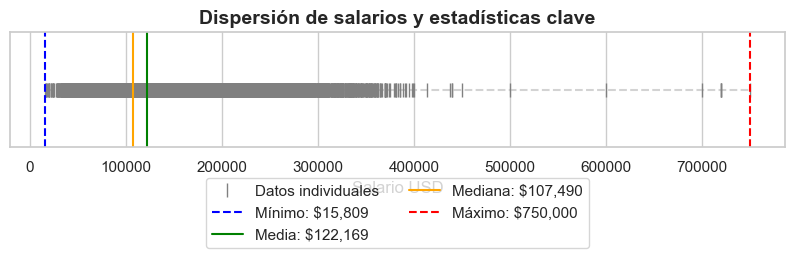

In [253]:
def generate_dispersion_plot(data):
    min_data = data.min()
    max_data = data.max()
    mean_data = data.mean()
    median_data = data.median()

    plt.figure(figsize=(10, 1.5))
    plt.hlines(1, min_data, max_data, colors='lightgray', linestyles='dashed')
    plt.plot(data, [1]*len(data), '|', color='gray', markersize=10, label='Datos individuales')

    plt.axvline(min_data, color='blue', linestyle='--', label=f'Mínimo: ${min_data:,.0f}')
    plt.axvline(mean_data, color='green', linestyle='-', label=f'Media: ${mean_data:,.0f}')
    plt.axvline(median_data, color='orange', linestyle='-', label=f'Mediana: ${median_data:,.0f}')
    plt.axvline(max_data, color='red', linestyle='--', label=f'Máximo: ${max_data:,.0f}')

    plt.yticks([])
    plt.xlabel('Salario USD')
    plt.title('Dispersión de salarios y estadísticas clave', fontsize=14, fontweight='bold')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
    plt.show()

generate_dispersion_plot(all_tech_jobs_df['Salary USD'])

**Comentario**: Vemos que los salarios que son mayores que aproximadamente 420.000 USD son valores atípicos que distorsionan el análisis. Por lo tanto, en la siguiente celda de código los eliminaremos para obtener una visión más clara de los datos.

<b>Eliminación de datos que generan ruido y visualización de dispersión de datos</b>

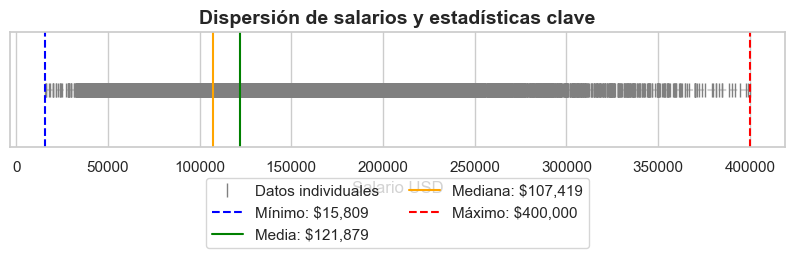

In [254]:
all_tech_jobs_df = all_tech_jobs_df[all_tech_jobs_df['Salary USD'] < 410000]
generate_dispersion_plot(all_tech_jobs_df['Salary USD'])

**Comentario**: Tras eliminar los valores atípicos, podemos observar que la mayoría de los salarios se concentran en un rango más estrecho, lo que nos permite tener una mejor comprensión de la distribución de los salarios en el mercado laboral tecnológico. 

<b>Recálculo de datos estadísticos de puestos tecnológicos por países</b>

Como hemos eliminado los valores atípicos, es necesario recalcular los datos estadísticos de puestos tecnológicos por países. Esto nos permitirá tener una visión más precisa de la situación actual del mercado laboral tecnológico a nivel global.

In [255]:
salary_stats_by_country = all_tech_jobs_df.groupby('Country')['Salary USD'].agg(
    Max_Salary='max',
    Min_Salary='min',
    Avg_Salary='mean',
    Median_Salary='median',
    Std_Dev_Salary='std',
    Count_Offers='count'
).round(2).sort_values(by='Avg_Salary', ascending=False)

salary_stats_by_country.columns = [
    'Job Max Salary',
    'Job Min Salary',
    'Job Avg Salary',
    'Job Median Salary',
    'Job Std Dev Salary',
    'Job Count Offers'
]

display(salary_stats_by_country.head(10))

,Job Max Salary,Job Min Salary,Job Avg Salary,Job Median Salary,Job Std Dev Salary,Job Count Offers
Country,,,,,,
switzerland,399095,32692,152700.41,133978.0,74606.69,749
united states,400000,24000,151708.67,143000.0,62766.43,3989
denmark,381575,28609,149662.23,128975.0,75372.60,779
norway,371087,34254,143997.73,125521.0,68060.38,726
singapore,372206,36295,124324.78,110284.0,56761.07,742
netherlands,322318,35429,122599.88,107969.0,58097.36,767
canada,366957,35504,121319.16,109578.0,58317.71,872
sweden,326260,34357,120646.96,105387.0,57791.18,791
australia,341146,34323,118550.43,102204.0,58114.28,743


**Comentario**: Vemos que tras eliminar los valores atípicos, la media de los salarios ha disminuido, lo que indica que los salarios más altos estaban distorsionando el análisis e incluso algunos páises como estados unidos y suiza se han intercambiado. Ahora podemos ver una distribución más clara de los salarios en el mercado laboral tecnológico.

<b>Dispersión de datos por países</b>


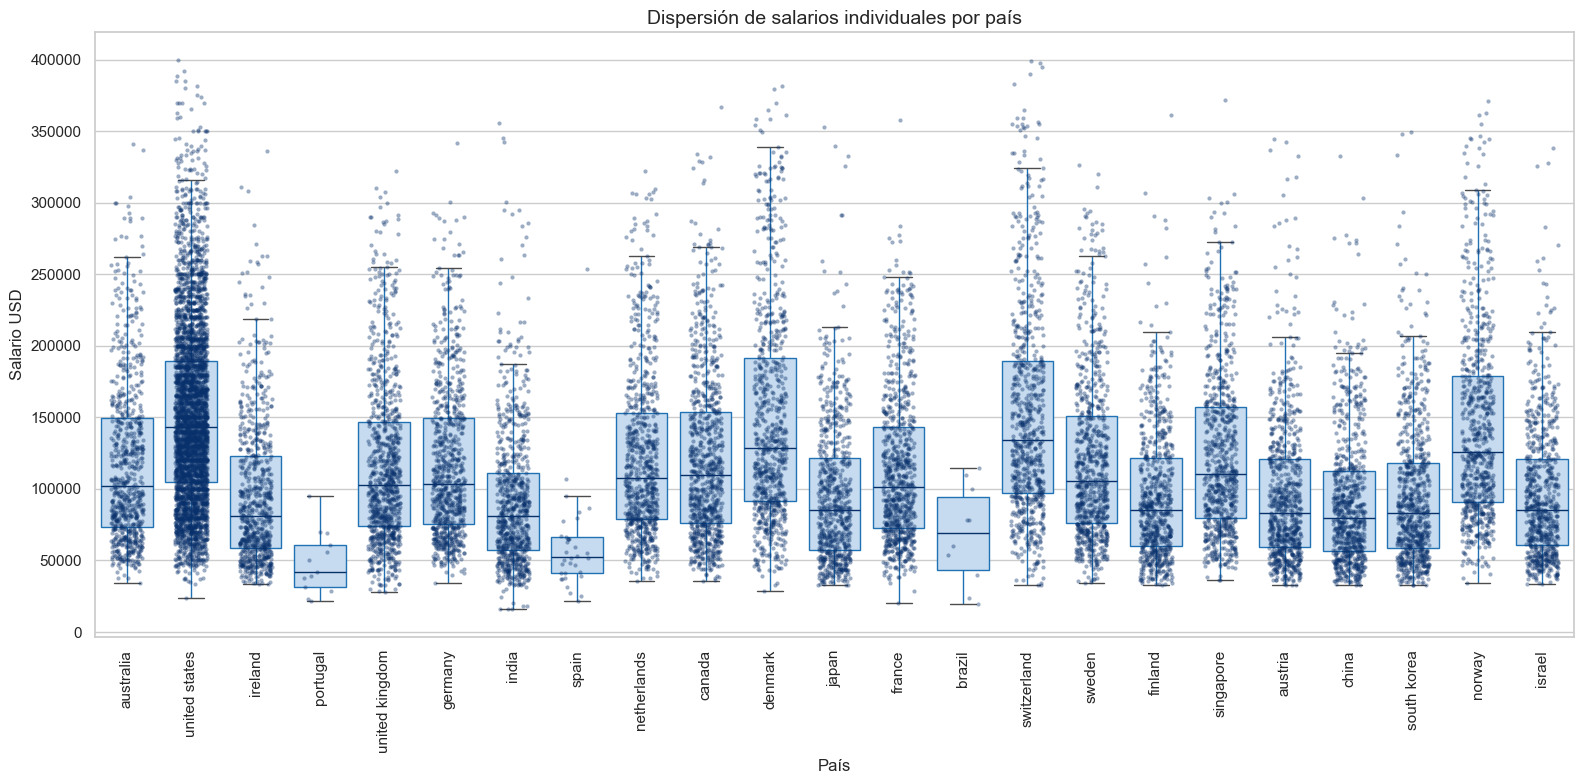

In [256]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
sns.boxplot(
    data=all_tech_jobs_df,
    x='Country',
    y='Salary USD',
    showcaps=True,
    boxprops={'facecolor': '#c6dbef', 'edgecolor': '#2171b5'},
    whiskerprops={'color': '#2171b5'},
    medianprops={'color': '#08306b'},
    showfliers=False
)

sns.stripplot(
    data=all_tech_jobs_df,
    x='Country',
    y='Salary USD',
    color='#08306b',
    size=3,
    jitter=0.25,
    alpha=0.4
)

plt.xticks(rotation=90)
plt.title('Dispersión de salarios individuales por país', fontsize=14)
plt.ylabel('Salario USD')
plt.xlabel('País')
plt.tight_layout()
plt.show()

**Comentario**: Algunas cosas que podemos observar en el gráfico de dispersión por países son:

- En general, en todos los países hay bastantes valores atípicos, lo cual es normal en el mercado laboral tecnológico, ya que hay puestos de trabajo muy bien remunerados que distorsionan la media.
- En españa vemos un único dato que está muy por encima de la media, lo cual es un valor atípico que distorsiona el análisis. Esto puede deberse a un puesto de trabajo muy especializado o a una oferta de trabajo muy bien remunerada que es poco representativa del mercado laboral en general. Lo mismo ocurre en la mayoría de países.
- En general, entodos los páises vemos un volumen similar de ofertas de trabajo, lo cual es positivo para el análisis posterior. Esto indica que hay una demanda similar de puestos de trabajo tecnológicos en todos los países analizados, aunque hay que subrayar que la diferencia es significativa entre estados unidos y el resto de países, ya que en estados unidos hay una gran cantidad de ofertas de trabajo tecnológicas, lo cual es normal dado que es uno de los países más avanzados tecnológicamente.

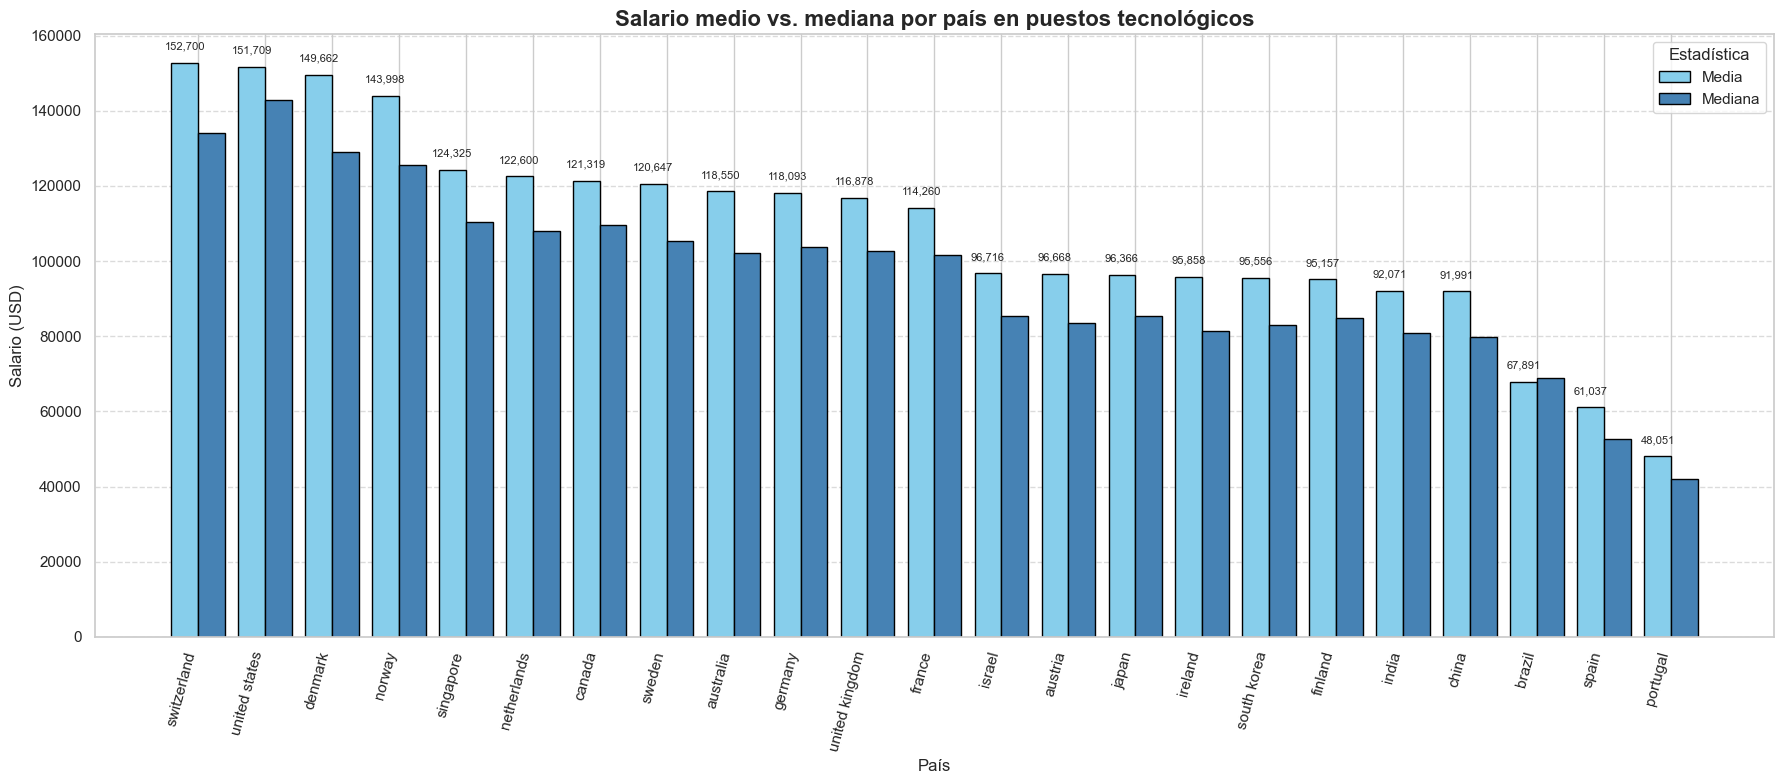

In [257]:
countries = salary_stats_by_country.index
avg_salary = salary_stats_by_country['Job Avg Salary']
median_salary = salary_stats_by_country['Job Median Salary']

x = np.arange(len(countries))  
width = 0.4  

fig, ax = plt.subplots(figsize=(18, 8))

bars1 = ax.bar(x - width/2, avg_salary, width, label='Media', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, median_salary, width, label='Mediana', color='steelblue', edgecolor='black')

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 3000,
            f'{height:,.0f}', ha='center', va='bottom', fontsize=8)
    
ax.set_title('Salario medio vs. mediana por país en puestos tecnológicos', fontsize=16, fontweight='bold')
ax.set_ylabel('Salario (USD)', fontsize=12)
ax.set_xlabel('País', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(countries, rotation=75, ha='right')
ax.legend(title='Estadística')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comentario:** A primera vista parece que los mejores países para trabajar en puestos tecnológicos son Estados Unidos, Suiza, Almenaria, Noruega, etc. Sin embargo, es importante tener en cuenta que estos países también tienen un alto coste de vida, lo que puede afectar la percepción del salario. Por lo tanto, es necesario normalizar los salarios con respecto al coste de vida para obtener una comparación más justa entre los países, vamos a realizar un análisis de los salarios normalizados por coste de vida. Además, podemos apreciar que la mediana es menos sensible a los valores atípicos, lo que indica que la mayoría de los salarios se concentran en un rango más estrecho, lo cual es positivo para el análisis posterior.

<b> Salario normalizado teniendo en cuenta el coste de vida</b>

Si dividimos el salario medio en puestos te Este ratio nos permitirá comparar los salarios en relación al coste de vida de cada país. Se calcula dividiendo el salario promedio por el coste de vida del país.


,Country,salary_life_cost_ratio
9,india,4342.980189
4,china,2901.917981
2,brazil,2248.046358
22,united states,2154.952699
12,japan,2090.366377
5,denmark,2070.017012


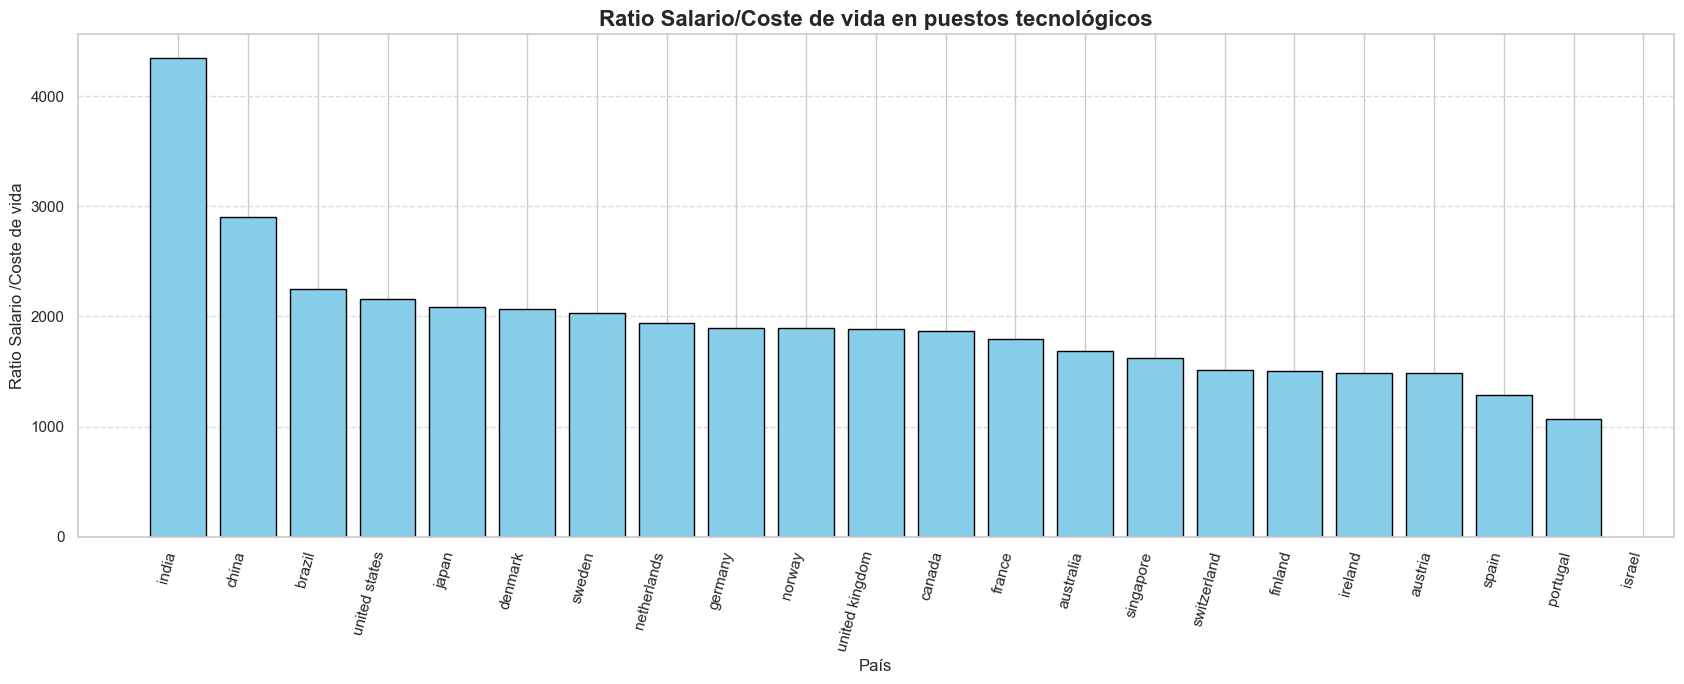

In [258]:
macro_indicators_by_country = pd.merge(salary_stats_by_country, indicators_by_country, on="Country", how='outer')
macro_indicators_by_country['salary_life_cost_ratio'] = macro_indicators_by_country['Job Avg Salary'] / macro_indicators_by_country['Cost of Living Index']
macro_indicators_by_country.sort_values(by='salary_life_cost_ratio', ascending=False, inplace=True)

display(macro_indicators_by_country.loc[:5,['Country', 'salary_life_cost_ratio']])

fig, ax = plt.subplots(figsize=(17, 7))
bars = ax.bar(macro_indicators_by_country['Country'], macro_indicators_by_country['salary_life_cost_ratio'], color='skyblue', edgecolor='black')

ax.set_title('Ratio Salario/Coste de vida en puestos tecnológicos', fontsize=16, fontweight='bold')
ax.set_ylabel('Ratio Salario /Coste de vida', fontsize=12)
ax.set_xlabel('País', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comentario:** Lo más llamativo es que suiza ha pasado del segundo puesto a el puesto 18, lo cual es un cambio significativo. Esto indica que, aunque Suiza tiene salarios altos, el coste de vida también es muy alto. Por otro lado, países como India y Filipinas han mejorado su posición en el ranking, lo que sugiere que tienen salarios más competitivos en relación al coste de vida. Otros países como Francia, España y Portugal han mantenido una posición similar. 
<b>Puestos de trabajos normalizados con respecto al salario medio del país</b>

En este caso queremos comprobar cómo se comportan los salarios de los puestos tecnológicos en relación al salario medio del país. Para ello, calcularemos el ratio entre el salario medio de los puestos tecnológicos y el salario medio del país.

,Country,job_salary_country_salary_ratio
9,india,239.500507
2,brazil,39.675425
14,norway,30.085144
8,germany,29.168538
19,sweden,29.109715


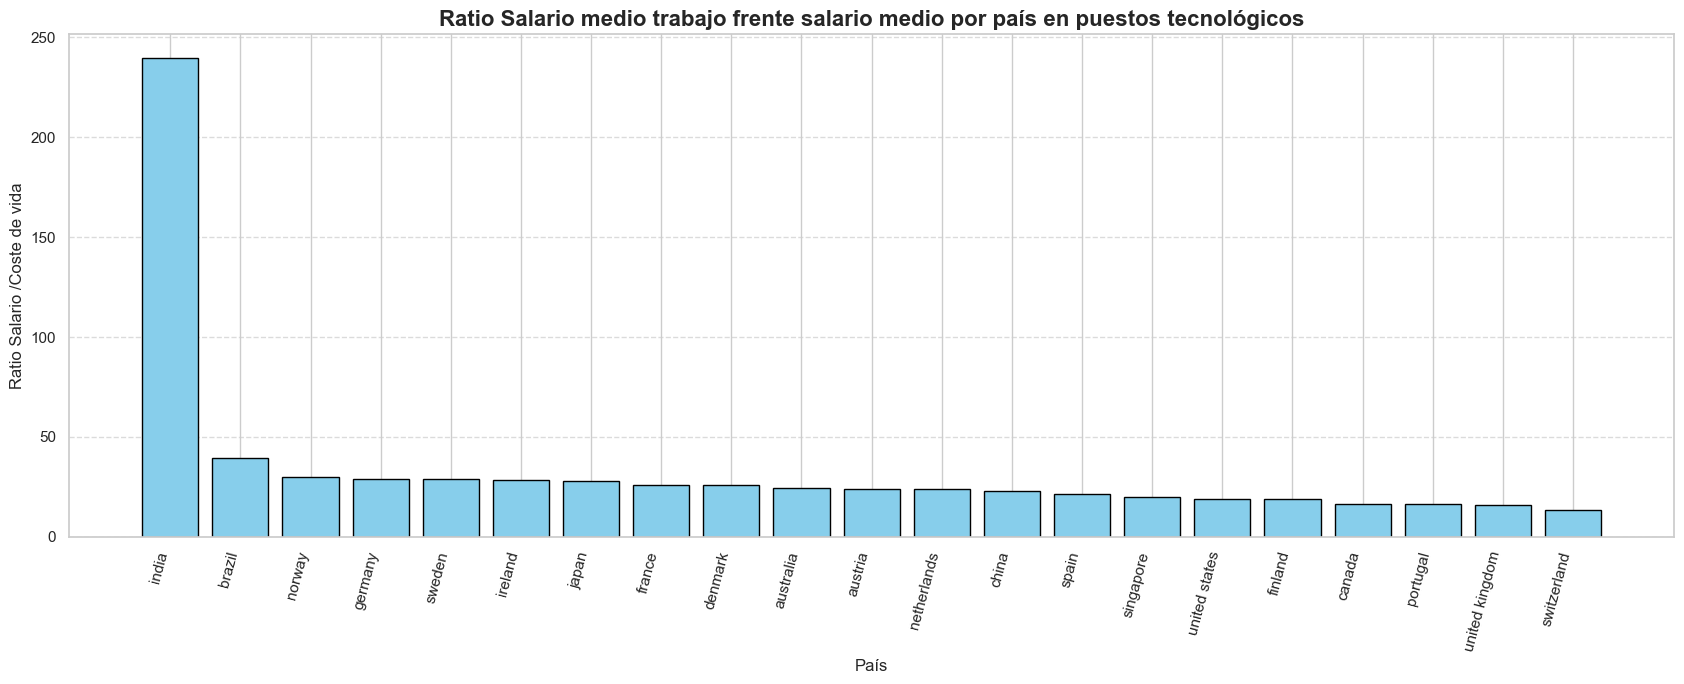

In [259]:
macro_indicators_by_country['job_salary_country_salary_ratio'] = (
    macro_indicators_by_country['Job Avg Salary'] / macro_indicators_by_country['Country Avg Salary']
)

macro_indicators_by_country = macro_indicators_by_country.dropna(subset=['job_salary_country_salary_ratio'])
macro_indicators_by_country = macro_indicators_by_country.sort_values(
    by='job_salary_country_salary_ratio', ascending=False
)

display(macro_indicators_by_country.loc[:, ["Country", "job_salary_country_salary_ratio"]].head(5))

fig, ax = plt.subplots(figsize=(17, 7))
bars = ax.bar(
    macro_indicators_by_country['Country'],
    macro_indicators_by_country['job_salary_country_salary_ratio'],
    color='skyblue',
    edgecolor='black'
)

ax.set_title('Ratio Salario medio trabajo frente salario medio por país en puestos tecnológicos', fontsize=16, fontweight='bold')
ax.set_ylabel('Ratio Salario /Coste de vida', fontsize=12)
ax.set_xlabel('País', fontsize=12)

plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Comentario**: Este ratio nos dice cuantas veces esta contenido el salario medio de los puestos tecnológicos en el salario medio de los puestos tecnólogicos en el país. Por ejemplo, si el ratio es 2, significa que el salario medio de los puestos tecnológicos es el doble del salario medio del país. Esto nos permitirá identificar qué países tienen salarios tecnológicos más altos en relación al salario medio del país. Lo que podemos apreciar a simple vista, es que aunque países como india, brasil, Alemania siguen manteniendo posiciones similares en comparación con el ratio de coste de vida, otros países como Reino unido, España o China cambian drásticamente su posiciones.

### **Nota Importante**: 

A partir de este punto, el hecho de que la India tenga un contraste tan grande con el resto de países, hace que el analísis se distorsione, se barajarón posibilidades como:

- **Eliminar los datos de la India:** Aunque tentador para que el estudio no se distorsionase, si lo hubieramos aplicado en este momento se podría haber considerado como una forma de "p-hacking" o selección de datos a conveniencia. 
- **Cortar todos los datos por encima de un umbral:** Limitar el máximo valor que puede tener la india, al doble o un 0.5 más del siguiente país en el ranking, esto también es tentador, pero no hay suficiente rigor científico para elegir un umbral adecuado, por lo que se ha decidido no aplicar esta técnica.
- **Usar escalas logarítmicas solo para la visualización:** Esta técnica hubiera suavizado la visualización, pero no es una solución adecuada que buscabamos dado que luego calcularemos índices compuestos cuyo calculo con escalas logarítmicas complicaría mucho el proceso.

La opción que se ha elegido ha sido dejar los datos y demostrar que nuestros sistema para encontrar el mejor país para trabajar en puestos tecnológicos es robusto y no se ve afectado por los valores atípicos, demostrando que a pesar de que India tenga un salario medio excesivamente alto en contraste con el coste de vida y el salario medio del país, se verá duramente castigado por el índice de desarrollo humano, que es un indicador más robusto de la calidad de vida en un país.


<b>Teniendo en cuenta los dos ratios</b>

Hasta el momento tenemos dos métricas importantes para evaluar el salario medio de los trabajos por países, los cuales, son:

- Ratio salario promedio con respecto al coste de vida.
- Ratio salario promedio con respecto al salario medio del país.

Para intentar tener un visión más cercana a la realidad, normalizaremos ambas métricas para que tengan un rango de 0 a 1. De esta manera, podremos comparar los países de manera más justa y obtener una visión más clara de la situación del mercado laboral tecnológico a nivel global.

In [260]:
min_lcr = macro_indicators_by_country['salary_life_cost_ratio'].min()
max_lcr = macro_indicators_by_country['salary_life_cost_ratio'].max()
min_jsr = macro_indicators_by_country['job_salary_country_salary_ratio'].min()
max_jsr = macro_indicators_by_country['job_salary_country_salary_ratio'].max()

macro_indicators_by_country['scaled_life_cost_ratio'] = (
    macro_indicators_by_country['salary_life_cost_ratio'] - min_lcr
) / (max_lcr - min_lcr)

macro_indicators_by_country['scaled_salary_ratio'] = (
    macro_indicators_by_country['job_salary_country_salary_ratio'] - min_jsr
) / (max_jsr - min_jsr)

macro_indicators_by_country['two_ratios_score'] = (
    macro_indicators_by_country['scaled_life_cost_ratio'] + macro_indicators_by_country['scaled_salary_ratio']
) / 2

macro_indicators_by_country = macro_indicators_by_country.sort_values('two_ratios_score', ascending=False)

display(macro_indicators_by_country.head(5))

,Country,Job Max Salary,Job Min Salary,Job Avg Salary,Job Median Salary,Job Std Dev Salary,Job Count Offers,Cost of Living Index,Country Median Salary,Country Avg Salary,Country Lowest Salary,Country Highest Salary,Human Development Index,salary_life_cost_ratio,job_salary_country_salary_ratio,scaled_life_cost_ratio,scaled_salary_ratio,two_ratios_score
9,india,356015,15809,92071.18,80880.0,49788.76,793,21.2,327.97,384.43,97.07,1717.92,0.685,4342.980189,239.500507,1.000000,1.000000,1.000000
4,china,332938,33013,91990.80,79723.0,47066.81,761,31.7,3684.93,4027.40,1015.07,17945.21,0.797,2901.917981,22.841238,0.560324,0.041240,0.300782
2,brazil,115000,19910,67891.00,69000.0,34139.47,10,30.2,1490.04,1711.16,432.27,7609.56,0.786,2248.046358,39.675425,0.360825,0.115735,0.238280
12,japan,353055,33092,96365.89,85514.0,49735.92,703,46.1,3158.67,3453.12,869.97,15391.82,0.925,2090.366377,27.906904,0.312716,0.063657,0.188186
19,sweden,326260,34357,120646.96,105387.0,57791.18,791,59.3,3568.16,4144.56,1043.00,18389.75,0.959,2034.518718,29.109715,0.295676,0.068980,0.182328


<b>Investigando el mejor lugar para trabajar (incluyendo del índice de desarrollo humano)</b>

Finalmente, para obtener una visión más completa de los países, incluiremos el índice de desarrollo humano (IDH) en nuestro análisis. Dado que el IDH ya lo tenemos normalizado, lo que haremos será ponderar las dos métricas anteriores con el IDH. De esta manera, podremos obtener una visión más completa de los países y su situación en el mercado laboral tecnológico. Además, lo haremos dinámico de tal manera que los dos ratios anteriores tendrán un peso igual y el IDH tendrá un peso dinámico que podremos ajustar según nuestras preferencias.

Para definir el "mejor lugar para trabajar", este análisis pondera las dos dimensiones clave en la decisión de un profesional, otorgando una ligera prioridad a la calidad de vida. Se ha establecido una ponderación donde la Calidad de Vida, representada por el Índice de Desarrollo Humano (IDH), constituye el 55% de la puntuación final, mientras que la Oportunidad Económica, representada por los ratios salariales, conforma el 45% restante. Esta decisión metodológica se fundamenta en la premisa de que, si bien ambos factores son cruciales, un entorno social estable y con buenos servicios a menudo inclina la balanza en la decisión de un profesional a largo plazo, por lo que se le asigna un énfasis ligeramente mayor.

,Country,best_place_to_work_score
14,norway,0.623421
5,denmark,0.615848
19,sweden,0.610820
8,germany,0.601547
13,netherlands,0.591397


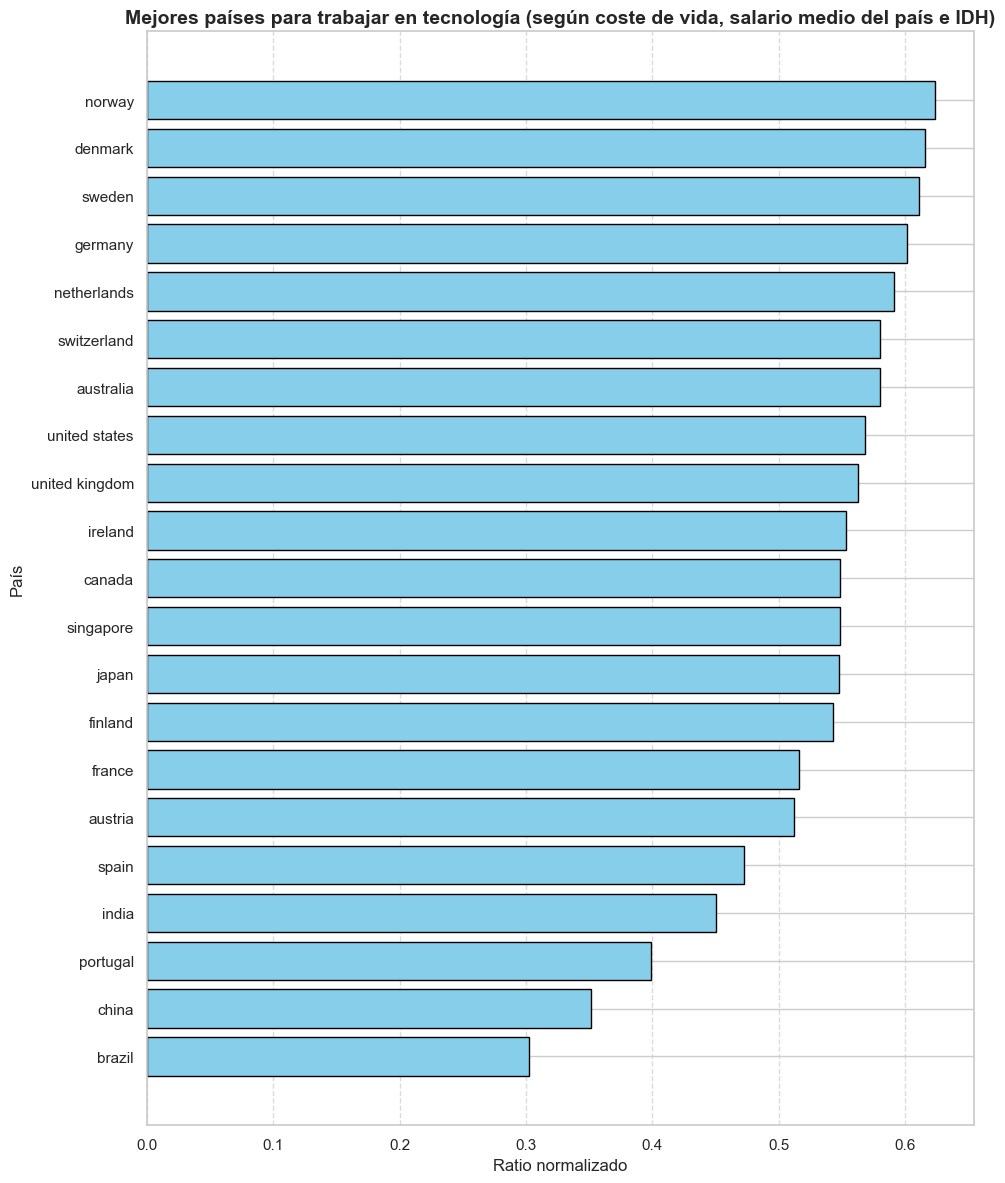

In [261]:
IDH_IMPORTANCE = 0.55 # Aqui le damos una importancia al IDH del 50%

min_idh = macro_indicators_by_country['Human Development Index'].min()
max_idh = macro_indicators_by_country['Human Development Index'].max()

macro_indicators_by_country['scaled_idh'] = (
    macro_indicators_by_country['Human Development Index'] - min_idh
) / (max_idh - min_idh)


macro_indicators_by_country['best_place_to_work_score'] = (
    macro_indicators_by_country['two_ratios_score'] * (1 - IDH_IMPORTANCE) +
    macro_indicators_by_country['scaled_idh'] * IDH_IMPORTANCE
)

macro_indicators_by_country = macro_indicators_by_country.sort_values(
    'best_place_to_work_score', ascending=False
)

display(macro_indicators_by_country[['Country', 'best_place_to_work_score']].head(5))

macro_indicators_by_country.sort_values(by='best_place_to_work_score', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(10, 12))
bars = ax.barh(macro_indicators_by_country['Country'], macro_indicators_by_country['best_place_to_work_score'], color='skyblue', edgecolor='black')

ax.set_title('Mejores países para trabajar en tecnología (según coste de vida, salario medio del país e IDH)', fontsize=14, fontweight='bold')
ax.set_xlabel('Ratio normalizado', fontsize=12)
ax.set_ylabel('País', fontsize=12)
ax.invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Comentario**:Podemos apreciar como teniendo en cuenta las 3 metricas con un 50% en el índice de desarrollo humano, y un 50% en lo referente a lo económico, los mejores países para trabajar son los del norte de Europa, como Noruega, Dinamarca, Suecia, etc.

<b>Contraste de resultados en los rankings según la metríca utilizada</b>

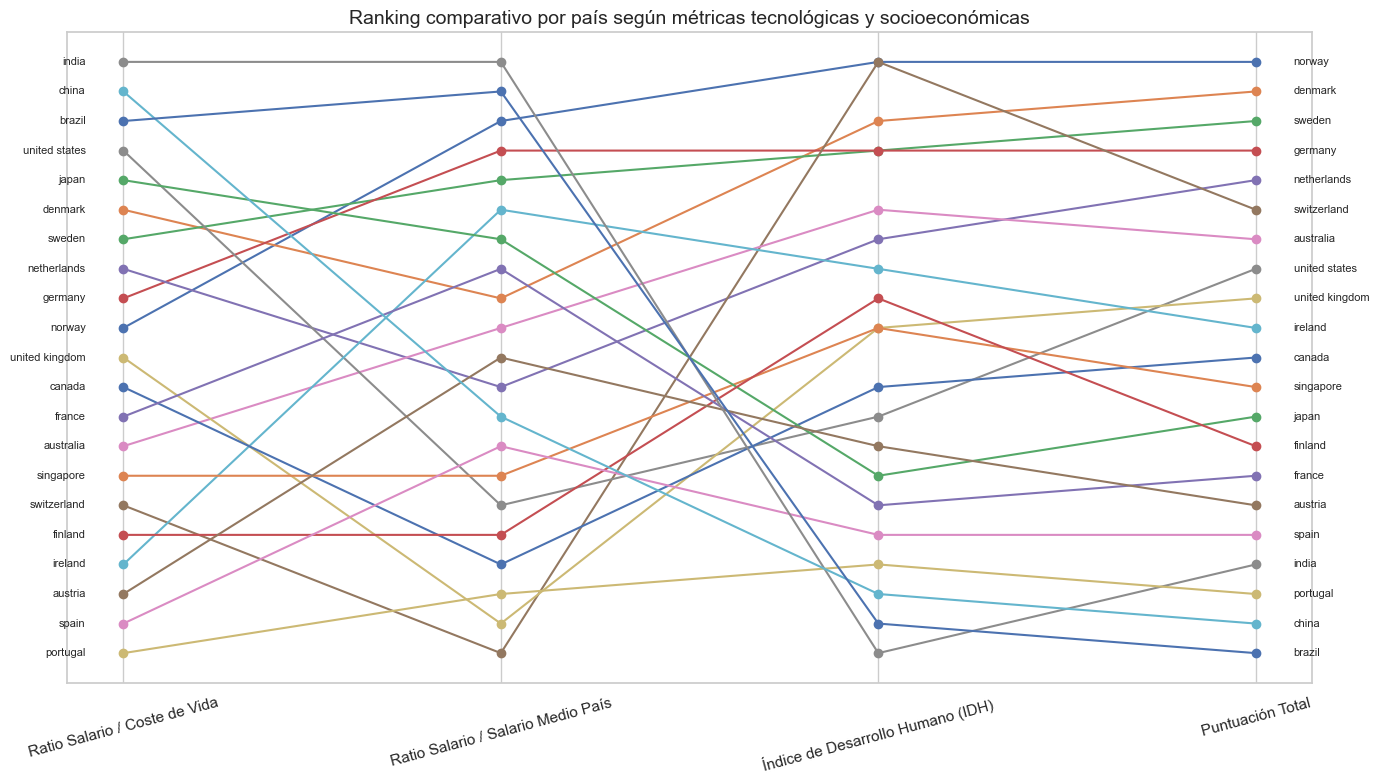

In [262]:
macro_indicators_by_country['rank_life_cost'] = macro_indicators_by_country['salary_life_cost_ratio'].rank(ascending=False).astype(int)
macro_indicators_by_country['rank_salary_ratio'] = macro_indicators_by_country['job_salary_country_salary_ratio'].rank(ascending=False).astype(int)
macro_indicators_by_country['rank_best_place'] = macro_indicators_by_country['best_place_to_work_score'].rank(ascending=False).astype(int)
macro_indicators_by_country['rank_idh'] = macro_indicators_by_country['scaled_idh'].rank(ascending=False).astype(int)

rank_df = macro_indicators_by_country[['Country', 
              'rank_life_cost', 
              'rank_salary_ratio', 
              'rank_idh',
              'rank_best_place']].copy()

rank_df_long = rank_df.melt(
    id_vars='Country',
    var_name='Ranking Type',
    value_name='Rank'
)

nombre_columnas = {
    'rank_life_cost': 'Ratio Salario / Coste de Vida',
    'rank_salary_ratio': 'Ratio Salario / Salario Medio País',
    'rank_idh': 'Índice de Desarrollo Humano (IDH)',
    'rank_best_place': 'Puntuación Total'
}

rank_df_long['Ranking Type'] = rank_df_long['Ranking Type'].map(nombre_columnas)

plt.figure(figsize=(14, 8))

for country in rank_df_long['Country'].unique():
    data = rank_df_long[rank_df_long['Country'] == country]
    plt.plot(data['Ranking Type'], data['Rank'], marker='o')

    plt.text(
        x=-0.1,
        y=data['Rank'].values[0],
        s=country,
        fontsize=8,
        va='center',
        ha='right'
    )

    plt.text(
        x=len(data['Ranking Type'].unique()) - 0.9,
        y=data['Rank'].values[-1],
        s=country,
        fontsize=8,
        va='center',
        ha='left'
    )

plt.gca().invert_yaxis()
plt.title('Ranking comparativo por país según métricas tecnológicas y socioeconómicas', fontsize=14)
plt.yticks([])
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Comentario**: En este último gráfico podemos ver cómo cambia el ranking de los países según la métrica utilizada. Por ejemplo, en el ranking de salario normalizado con respecto al coste de vida y el salario medio del país, Suiza tiene posiciones muy bajas, sin embargo, el hecho de que tenga un IDH muy alto hace que suba en el ranking final. La conclusión final es que los países nórdicos son los mejores para trabajar en puestos tecnológicos, ya que tienen salarios altos, un coste de vida razonable y un IDH muy alto.

<b>Puestos de trabajo más demandados.</b>

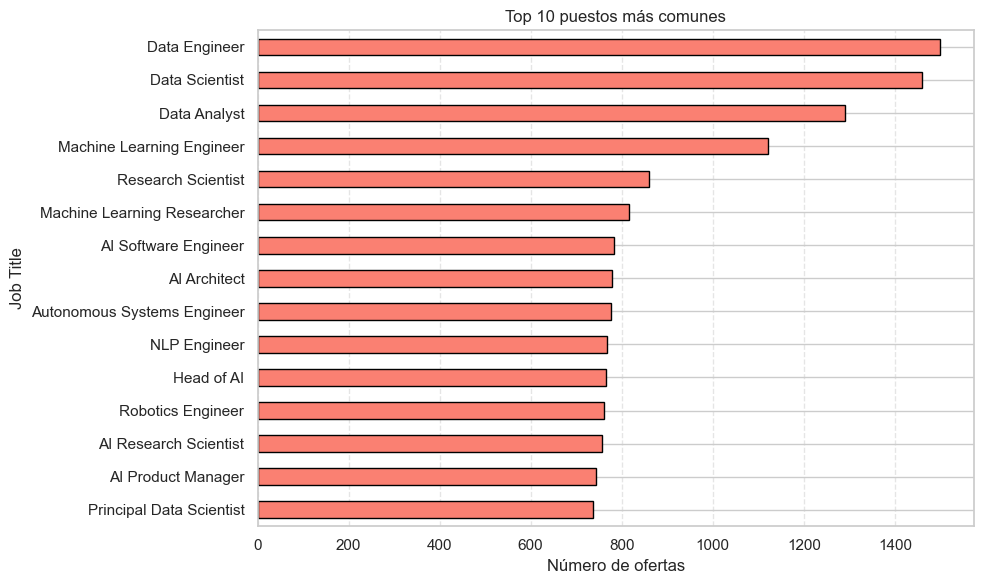

In [263]:
all_tech_jobs_df['Job Title'].value_counts().head(15).plot(
    kind='barh', figsize=(10,6), color='salmon', edgecolor='black'
)
plt.title('Top 10 puestos más comunes')
plt.xlabel('Número de ofertas')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Comentario**: Vemos que en general la mayoría de puestos de trabajos están relacionados con la inteligencia artificial, sin embargo, tenemos que tener en cuenta que la combinación de datasets ha cesgado completamente nuestro analísis, hemos escogido un dataset con aproximadamente 15.000 entradas que sabemos que están asociadas a la IA y otro dataset con aproximadamente 4.000 entradas que sabemos que están asociadas a puestos tecnológicos en general, de los cuales, un subconjunto estarán asociados con la IA, por lo que es normal que la mayoría de puestos de trabajo estén relacionados con la IA, y no debemos tomarlo como una conclusión general, sino como una conclusión específica de los datasets que hemos utilizado.

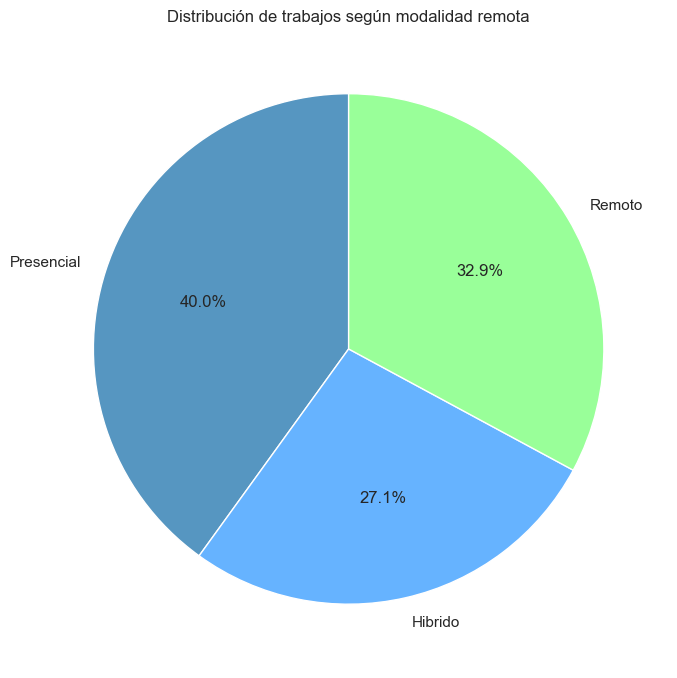

In [264]:
remote_counts = all_tech_jobs_df['Remote Ratio'].value_counts().sort_index()
labels = ['Presencial', 'Hibrido', 'Remoto']
remote_counts.index = labels

remote_counts.plot.pie(autopct='%1.1f%%', figsize=(7,7), startangle=90, colors=["#5696c1",'#66b3ff','#99ff99'])
plt.title('Distribución de trabajos según modalidad remota')
plt.ylabel('')
plt.tight_layout()
plt.show()


**Comentario**: Vemos como en el anterior gráfico hay una proporcion similar entre los diferentes tipos de trabajos, esto nos puede indicar un dataset balanceado y equilibrado en cuanto a tipo de trabajo, un requisito ideal para luego hacer Machine Learning. Hay suficiente representatividad de cada tipo trabajo y el modelo que aprenda de los datos podrá generalizar mejor.

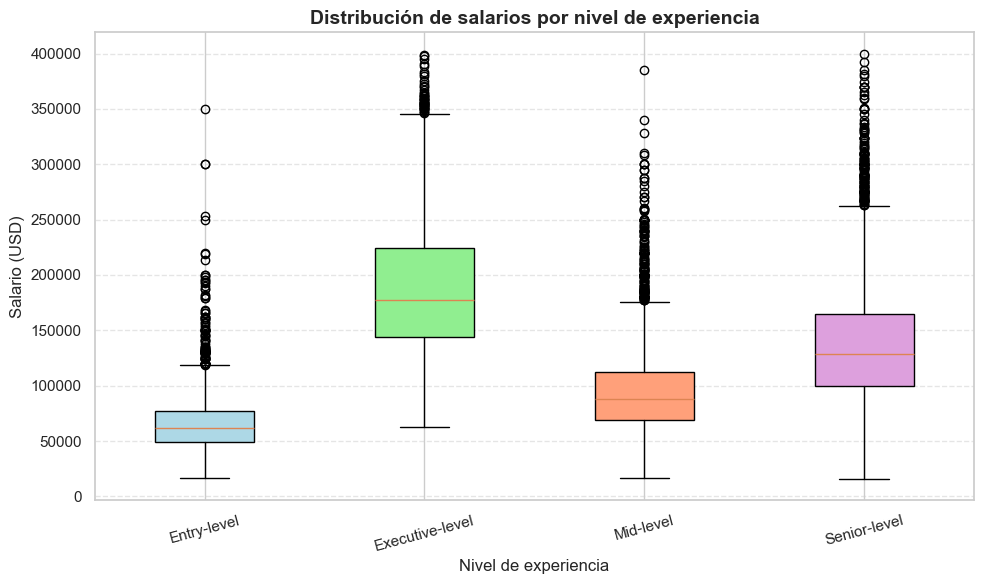

In [265]:
experience_levels = all_tech_jobs_df["Experience Level"].unique()
experience_levels = sorted(experience_levels) 

salary_data = [all_tech_jobs_df[all_tech_jobs_df["Experience Level"] == level]["Salary USD"].dropna() for level in experience_levels]

fig, ax = plt.subplots(figsize=(10, 6))
box = ax.boxplot(salary_data, patch_artist=True, tick_labels=experience_levels)

colors = ['#ADD8E6', '#90EE90', '#FFA07A', '#DDA0DD']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Distribución de salarios por nivel de experiencia', fontsize=14, fontweight='bold')
ax.set_ylabel('Salario (USD)')
ax.set_xlabel('Nivel de experiencia')
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

**Comentario**: Podemos apreciar que los máximos y mínimos así como la media se ajustan al grado de expericencia, lo cual es normal, ya que a mayor experiencia, mayor salario. Además, vemos una diferencia notabla en los puestos ejecutivos, esto de alguna manera nos muestra la brecha salarial tan grande que hay entre puestos ejecutivos y los otros tipos de puestos de trabajo.

## Conclusiones finales

En este trabajo se ha hecho una analísis superficial de los datos de empleo tecnológico a nivel global, utilizando datasets de puestos de trabajo en IA y tecnología. Las conclusiones a las que se han llegado al estudio son: 

- Cuando analizamos los datos de empleo tecnológico, hemos apreciado como había ciertos datos que sesgaban nuestro analísis, como por ejemplo, los salarios excesivamente altos de pocos puestos de trabajo en EEUU, tras eliminarlos, hemos podido obtener una visión más clara de la distribución de los salarios en el mercado laboral tecnológico a nivel global. Sin embargo, bien es cierto que al analizar la dispersión de los datos por páis, también individualmente por país se ven datos ruidosos. 

- Se ha apreciado que aunque en una primera impresión los mejores países para trabajar en puestos tecnológicos son Estados Unidos, Suiza, Alemania, Noruega, etc., al normalizar los salarios con respecto al coste de vida, se ha visto que Suiza pierde su posición privilegiada y otros países como India y Filipinas mejoran su posición en el ranking. 

- Se ha visto además, como la percepción cambia drásticamente dependiendo del ratio que se utilice para evaluar los salarios, lo cual es importante tener en cuenta a la hora de tomar decisiones sobre dónde trabajar. Por ejemplo, el ratio de salario normalizado con respecto al coste de vida y el salario medio del país puede dar una visión distorsionada de la realidad si no se tiene en cuenta el IDH. Si solo nos hubieramos fijado en los ratios de salario normalizado, podríamos haber llegado a la conclusión de que el mejor páis para vivir es la India, sin embargo, al incluir el IDH, en el cual, India tiene el último puesto, vemos como este país no es tan atractivo para vivir.  Esto demuestra que un análisis fiable no puede depender de una única métrica económica, sino que exige un enfoque holístico que pondere la calidad de vida para obtener una conclusión realista.

- Hay un equilibro entre los tipos de empleo demandados (remoto, híbrido, presencial), lo cual es positivo para el análisis posterior, ya que hay suficiente representatividad de cada tipo de trabajo y el modelo que aprenda de los datos podrá generalizar mejor.

- La distribución de salarios por nivel de experiencia y tipo de trabajo es coherente con lo esperado, ya que a mayor experiencia, mayor salario. Además, se ha visto una diferencia notable en los puestos ejecutivos, lo cual indica la brecha salarial tan grande que hay entre puestos ejecutivos y los otros tipos de puestos de trabajo, esto se corresponde bastante con lo que dice la intuición, por lo que es un indicativo de que el dataset es representativo y no tiene sesgos importantes.

## Próximos pasos y mejoras

- El problema de la India como caso excepcional es un tema que se podría tratar de manera más profunda, ya que es un país con salarios excesivamente altos en contraste con el coste de vida y el salario medio del país. Esto hace que tenga unas puntuaciones excesivamente altas en los ratios de salario normalizado con respecto al coste de vida y el salario medio del país, lo cual contamina todo el análisis. Habría que hacer algún tipo de normalización más sofisticada; por ejemplo, se podría aplicar una transformación logarítmica a los ratios antes de escalarlos. Esta técnica es estándar para manejar datos que abarcan varios órdenes de magnitud, ya que reduce el impacto de los valores extremos sin eliminar información. 

- Algunos países han sido eliminados de ciertos rankings por no aparecer en todos los datasets, por ejemplo, Israel y Corea del sur, sería interesante recopilar información adicional sobre estos países para incluirlos en el análisis y obtener una visión más completa del mercado laboral tecnológico a nivel global.

- Ampliar el análisis incluyendo más datasets relacionados con el mercado laboral tecnológico, como por ejemplo, datos de empleo en startups, empresas tecnológicas, etc. Este punto creo que es bastante importante, circunstancias como que China no parezca tener tantos puestos de trabajo tecnológicos como Estados Unidos puede implicar poca representatividad de los datos, ya que China es un país con una gran cantidad de empresas tecnológicas y startups. Por lo tanto, sería interesante incluir más datasets relacionados con el mercado laboral tecnológico en China y otros países para obtener una visión más completa.

- Añadir más métricas como el índice de bienestar social, el índice de felicidad, etc. para obtener una visión más completa de los países más atractivos para trabajar en puestos tecnológicos.

- Se podría hacer un análisis más profundo de los puestos de trabajo más demandados y analizarlos a nivel textual para hacer agrupaciones más precisas, por ejemplo, "Machine Learning Engineer" y "Machine Learning Researcher" podrían ser agrupados en una misma categoría, lo cual nos permitiría obtener una visión más clara de los puestos de trabajo más demandados en el mercado laboral tecnológico a nivel global.

## Cierre

Este análisis ha permitido arrojar luz sobre las múltiples dimensiones que influyen a la hora de evaluar la calidad del mercado laboral tecnológico a nivel global. La integración de indicadores salariales, coste de vida y calidad de vida (IDH) ha demostrado ser fundamental para obtener una perspectiva más realista y útil para la toma de decisiones, tanto a nivel individual como institucional.

A pesar de las limitaciones inherentes a los datos disponibles, el enfoque adoptado ha ofrecido una base sólida para comprender cómo se distribuyen las oportunidades laborales y los salarios en distintos países. El trabajo deja claro que no existe una única métrica que defina el "mejor país para trabajar", sino que se trata de una combinación de factores que deben ser ponderados cuidadosamente.

En definitiva, con más datos, más variables y mayor refinamiento se podría obtener una visión mas cercana a la realidad y llegar a conclusiones más robustas.

## Referencias

- [Kaggle - Global AI Job Market and Salary Trends 2025](https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025/data)
- [Kaggle - Global Tech Salary Dataset](https://www.kaggle.com/datasets/yaaryiitturan/global-tech-salary-dataset)
- [Kaggle - Cost of Living Index by Country (2024)](https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024)
- [Kaggle - List of Countries by Average Wage (Mensual y Anual)](https://www.kaggle.com/datasets/meeratif/list-of-countries-by-average-wage-monthly-yearly)
- [UNDP - Human Development Data Center](https://hdr.undp.org/data-center/documentation-and-downloads)
- [Documentación oficial de Python](https://docs.python.org/3/)
- [Documentación oficial librería pandas](https://pandas.pydata.org/docs/)
- [Documentación oficial librería matplotlib](https://matplotlib.org/stable/contents.html)
- [Documentación oficial librería seaborn](https://seaborn.pydata.org/)
- [Clasificación de IDF por ratio](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)
- [Definición de P-Hacking](https://en.wikipedia.org/wiki/Dragado_de_datos)

